In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bfs = pd.read_csv('https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv')
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Preliminary Analysis on the given data

In [5]:
bfs.shape

(537577, 12)

In [6]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
bfs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 183.6 MB


In [9]:
bfs.Purchase.min()

185

In [10]:
bfs.Purchase.max()

23961

In [24]:
max_purchase_info = bfs[bfs.Purchase == bfs.Purchase.max()]
max_purchase_info.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,NaN,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15.0,NaN,23961
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15.0,NaN,23961


In [25]:
max_purchase_info['Gender'].value_counts()

M    3
Name: Gender, dtype: int64

In [29]:
x = bfs[bfs.Purchase == bfs.Purchase.min()]
x.shape
x.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
27602,1004227,P00171342,M,26-35,19,A,0,0,13,16.0,NaN,185
377309,1004048,P00041442,F,36-45,1,B,1,0,13,14.0,16.0,185
403039,1001968,P00102142,M,26-35,11,B,2,0,13,16.0,NaN,185
411541,1003391,P00041442,M,18-25,4,A,0,0,13,14.0,16.0,185


**Observation**

From theabove cells we look int omax purchase information and minimum purchase information
For the maximum purchase information we keep in mind the gender of the person,age and the martial status of the person
Similarly for the minmum purchase we keep track of the gender and the martial status

But as the number of datapoints in max and min purchase is very small(3 and 4 repectively) we cannot generalise 
based on them

<AxesSubplot:>

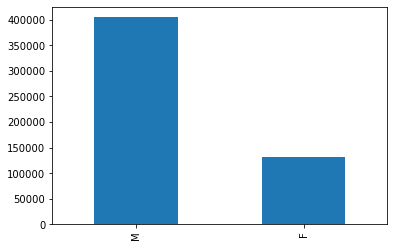

In [11]:
bfs.Gender.value_counts().plot(kind='bar')

In [12]:
bfs.Gender.value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

**Observation**

This implies many of the black friday shoppers were males 

In [31]:
bfs.Marital_Status.value_counts(normalize=True)*100

0    59.120275
1    40.879725
Name: Marital_Status, dtype: float64

In [32]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')